# Домашнее задание "Продвинутая линейная алгебра".

## Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:

m = np.array([[2, 2],
              [1, 3]])
print(m)


## Уровень 1:
Найдите спектральное разложение матрицы:

m = np.array([[1, 2],
              [2,3]])
print(m)


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [2]:
import numpy as np

In [10]:
'Придумайте матрицы, которые обладают следующими свойствами:'
'a) Диагональная, ортогональная, но не единичная(!)'

a = np.array([[-1,0,0],[0,-1,0],[0,0,-1]])
b = a.T
b

c = a @ b

c


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [15]:
'b) Верхнетреугольная, ортогональная'
'c) Нижнетреугольная, ортогональная'

# Если треугольная матрица ортогональна, то она диагональна. Значения по диагонали могут быть либо +1 либо -1

a = np.eye(3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
'd) Матрица, у которой определитель = 1, и все элементы не равны 0'

a = np.array([[2,1],[3,2]])
np.linalg.det(a)

0.9999999999999998

In [31]:
'Найдите собственные значения и собственные вектора матриц:'

m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [29]:
a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [32]:
'Уровень 1:'
'Найдите спектральное разложение матрицы:'

m = np.array([[1, 2], [2,3]]) 
print(m)

[[1 2]
 [2 3]]


In [40]:
a, U = np.linalg.eig(m)

np.dot(np.dot(U,np.diag(a)),U.T)

array([[1., 2.],
       [2., 3.]])

In [152]:
'Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от'
'различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*'

from sklearn.datasets import load_digits
print(digits.data.shape)
digits.images.shape

(1797, 64)


(1797, 8, 8)

<Figure size 432x288 with 0 Axes>

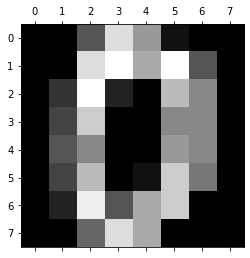

In [78]:
#можно пропустить. здесь я просто пытался понять что зашифровано в данных

X, y = load_digits(return_X_y=True)
img = X[0]
img = img.reshape((8,8))

plt.gray() 
plt.matshow(img) 
plt.show() 

<Figure size 432x288 with 0 Axes>

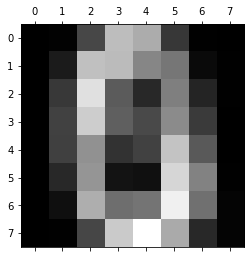

In [129]:
#можно пропустить. здесь я смотрю как восстановилась картинка при inverse_transform

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)
X2 = pca.transform(X)

X3 = pca.inverse_transform(X2)

X3[0]

img = X3[0]
img = img.reshape((8,8))

img

plt.gray() 
plt.matshow(img) 
plt.show() 

In [154]:
from sklearn.metrics import mean_squared_error


In [148]:
m = []
n = []

for i in range(1,64):
    m.append(i)
    
    pca = PCA(n_components=i)

    pca.fit(X)
    
    X2 = pca.transform(X)
    X3 = pca.inverse_transform(X2)
    
    k = mean_squared_error(X, X3)
    n.append(k)
    

Text(0, 0.5, 'MSE')

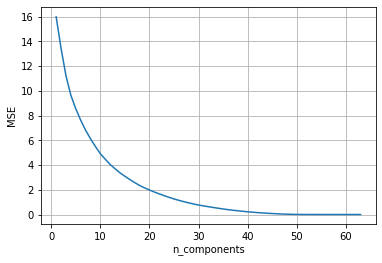

In [153]:
plt.plot(m,n)
plt.grid(True)
plt.xlabel("n_components")
plt.ylabel("MSE")